In [1]:
import yfinance as yf

In [2]:
df=yf.download('LTC-USD')

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,5.085890,5.170770,4.965950,5.058550,5.058550,3071840
2014-09-18,5.065430,5.065430,4.579960,4.685230,4.685230,4569260
2014-09-19,4.687290,4.755820,4.254350,4.327770,4.327770,3917450
2014-09-20,4.329200,4.616080,4.202190,4.286440,4.286440,5490660
2014-09-21,4.263070,4.300130,4.154990,4.245920,4.245920,2931220
...,...,...,...,...,...,...
2022-06-11,56.665623,57.678856,52.231976,52.291660,52.291660,735247033
2022-06-12,52.307575,52.590900,48.130508,48.228905,48.228905,674269221
2022-06-13,48.213318,48.213318,41.629677,43.300301,43.300301,1135771941


In [4]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

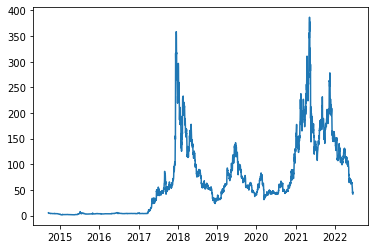

In [5]:
plt.plot(df.index, df['Adj Close'])

In [6]:
# train test split
to_row=int(len(df)*0.9)
training_data=list(df[0: to_row]['Adj Close'])
training_data

[5.058549880981445,
 4.685229778289795,
 4.327770233154297,
 4.286439895629883,
 4.245920181274414,
 4.242350101470947,
 4.746570110321045,
 4.666790008544922,
 4.514649868011475,
 4.433589935302734,
 4.421800136566162,
 4.233230113983154,
 4.246789932250977,
 4.474730014801025,
 4.42855978012085,
 4.322659969329834,
 4.175119876861572,
 3.938199996948242,
 3.6991400718688965,
 3.8223700523376465,
 3.8586299419403076,
 3.9078900814056396,
 3.9006600379943848,
 3.807389974594116,
 3.77266001701355,
 3.850330114364624,
 3.8617799282073975,
 4.0759100914001465,
 4.056419849395752,
 3.9908900260925293,
 3.993269920349121,
 4.055759906768799,
 3.9889400005340576,
 3.909830093383789,
 3.9400100708007812,
 3.843319892883301,
 3.739650011062622,
 3.747529983520508,
 3.6675500869750977,
 3.727180004119873,
 3.807310104370117,
 3.8460700511932373,
 3.72694993019104,
 3.785860061645508,
 3.753999948501587,
 3.570590019226074,
 3.585099935531616,
 3.5780599117279053,
 3.5917599201202393,
 3.644850

In [7]:
testing_data=list(df[to_row:]['Adj Close'])
testing_data

[219.52577209472656,
 178.11439514160156,
 179.72467041015625,
 180.37680053710938,
 174.29603576660156,
 178.68856811523438,
 183.23448181152344,
 179.48394775390625,
 183.13906860351562,
 189.23941040039062,
 185.53807067871094,
 179.68408203125,
 181.30886840820312,
 175.7406005859375,
 156.46401977539062,
 148.38987731933594,
 161.41200256347656,
 163.81834411621094,
 152.2317352294922,
 151.18145751953125,
 150.640869140625,
 145.34957885742188,
 140.5971221923828,
 144.9186248779297,
 153.1479949951172,
 166.1322021484375,
 169.25892639160156,
 170.60997009277344,
 167.54014587402344,
 173.89108276367188,
 178.70567321777344,
 178.771728515625,
 175.97238159179688,
 179.65866088867188,
 175.31857299804688,
 179.42605590820312,
 172.79776000976562,
 177.62832641601562,
 180.11839294433594,
 188.8141326904297,
 186.18930053710938,
 183.73052978515625,
 185.55674743652344,
 188.9398193359375,
 206.87078857421875,
 196.8691864013672,
 190.82228088378906,
 196.30950927734375,
 190.905

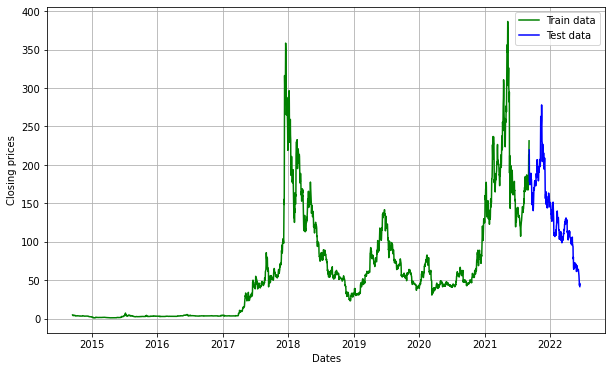

In [8]:
#spliting data into train and training set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing prices')
plt.plot(df[0:to_row]['Adj Close'], 'green',label='Train data')
plt.plot(df[to_row:]['Adj Close'], 'blue', label= 'Test data')
plt.legend()

In [9]:
model_predictions=[]
n_test_obser =len(testing_data)

In [10]:
import statsmodels.api as sm

In [11]:
for i in range(n_test_obser):
    model =sm.tsa.arima.ARIMA(training_data, order =(4,1,0))
    model_fit= model.fit()
    output=model_fit.forecast()
    yhat =list(output)[0]
    model_predictions.append(yhat)
    actual_test_value=testing_data[i]
    training_data.append(actual_test_value)
   # print(output)
    #break

In [12]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2828
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -9394.020
Date:                Wed, 15 Jun 2022   AIC                          18798.039
Time:                        15:32:18   BIC                          18827.774
Sample:                             0   HQIC                         18808.767
                               - 2828                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0170      0.007     -2.586      0.010      -0.030      -0.004
ar.L2          0.0133      0.007      1.903      0.057      -0.000       0.027
ar.L3          0.0010      0.007      0.132      0.8

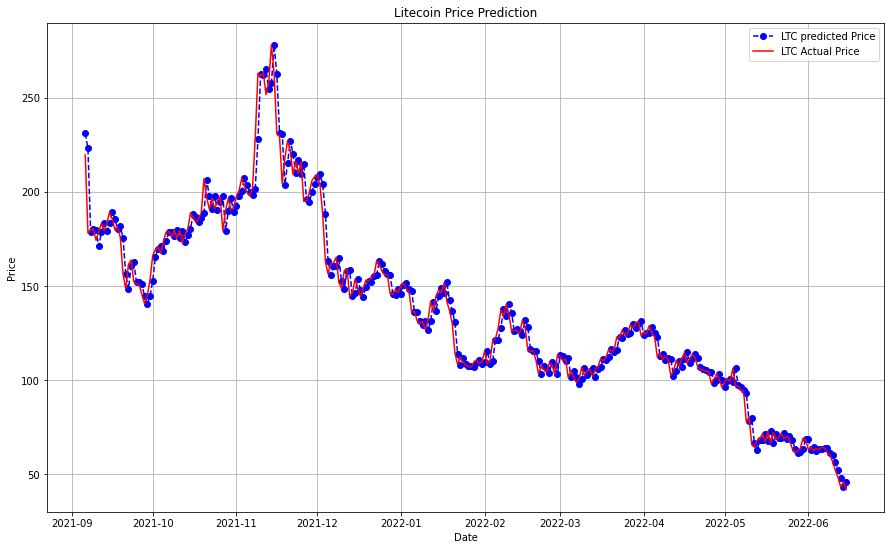

In [13]:
plt.figure(figsize=(15,9))
plt.grid(True)
date_range=df[to_row:].index
plt.plot(date_range, model_predictions,color='blue', marker='o', linestyle='dashed', label='LTC predicted Price')
plt.plot(date_range, testing_data, color='red', label='LTC Actual Price')
plt.title('Litecoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [14]:
mape=np.mean(np.abs(np.array(model_predictions) -np.array(testing_data))/np.abs(testing_data))

In [15]:
print('MAPE: '+str(mape))

MAPE: 0.037419387819558385


In [16]:
# the above mape is used for report performance
#Mape means mean Absolute percentage error
# Around 3.5% MAPE implies the model is about 96.5% accurate in predicting the test set observations.